# SportsWorldCentral Analytics


## Install new Python libraries

In [54]:
%pip install nfl-data-py


[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## Import Python libraries

In [55]:
import httpx
import pandas as pd
import nfl_data_py as nfl

## Setup global variables

In [56]:
base_url = "http://0.0.0.0:8000"

HEALTH_CHECK_ENDPOINT = "/"
LIST_LEAGUES_ENDPOINT = "/v0/leagues/"
LIST_PLAYERS_ENDPOINT = "/v0/players/"
LIST_PERFORMANCES_ENDPOINT = "/v0/performances/"
LIST_TEAMS_ENDPOINT = "/v0/teams/"
GET_COUNTS_ENDPOINT = "/v0/counts/"


## Create reusable function to call APIs

In [57]:
def call_api_endpoint(api_endpoint: str, api_params: dict = None) -> httpx.Response:
    with httpx.Client(base_url=base_url) as client:
        response = client.get(api_endpoint, params=api_params)
        response.raise_for_status()
        return response

## Gathering league information

In [58]:
league_api_response = call_api_endpoint(LIST_LEAGUES_ENDPOINT)
league_data = league_api_response.json()
display(league_data)

[{'league_id': 5001,
  'league_name': 'Pigskin Prodigal Fantasy League',
  'scoring_type': 'PPR',
  'last_changed_date': '2024-04-25',
  'teams': [{'league_id': 5001,
    'team_id': 1007,
    'team_name': 'Checkers Not Chess',
    'last_changed_date': '2024-04-23'},
   {'league_id': 5001,
    'team_id': 1003,
    'team_name': 'Dallas Steers',
    'last_changed_date': '2024-04-23'},
   {'league_id': 5001,
    'team_id': 1008,
    'team_name': 'Defending Champs',
    'last_changed_date': '2024-04-23'},
   {'league_id': 5001,
    'team_id': 1011,
    'team_name': 'Double Option',
    'last_changed_date': '2024-04-23'},
   {'league_id': 5001,
    'team_id': 1005,
    'team_name': 'Fighting Catfish',
    'last_changed_date': '2024-04-23'},
   {'league_id': 5001,
    'team_id': 1010,
    'team_name': 'Fumblerooski',
    'last_changed_date': '2024-04-23'},
   {'league_id': 5001,
    'team_id': 1004,
    'team_name': 'Never Gonna Give Up',
    'last_changed_date': '2024-04-23'},
   {'league_id

In [59]:
print(type(league_data))
print(type(league_data[0]))
print(len(league_data))

<class 'list'>
<class 'dict'>
5


## Get all teams in a league


In [60]:
team_api_parameters = {'league_id': '5001'}
team_api_response = call_api_endpoint(LIST_TEAMS_ENDPOINT, team_api_parameters)
team_data = team_api_response.json()
display(team_data)

[{'league_id': 5001,
  'team_id': 1001,
  'team_name': 'Roaring Kitties',
  'last_changed_date': '2024-04-23',
  'players': [{'player_id': 1001,
    'gsis_id': '00-0023459',
    'first_name': 'Aaron',
    'last_name': 'Rodgers',
    'position': 'QB',
    'last_changed_date': '2024-04-18'},
   {'player_id': 1002,
    'gsis_id': '00-0023853',
    'first_name': 'Matt',
    'last_name': 'Prater',
    'position': 'K',
    'last_changed_date': '2024-04-18'},
   {'player_id': 1003,
    'gsis_id': '00-0024243',
    'first_name': 'Marcedes',
    'last_name': 'Lewis',
    'position': 'TE',
    'last_changed_date': '2024-04-18'},
   {'player_id': 1007,
    'gsis_id': '00-0026293',
    'first_name': 'Matt',
    'last_name': 'Slater',
    'position': 'WR',
    'last_changed_date': '2024-04-18'},
   {'player_id': 1014,
    'gsis_id': '00-0027944',
    'first_name': 'Julio',
    'last_name': 'Jones',
    'position': 'WR',
    'last_changed_date': '2024-04-18'},
   {'player_id': 1018,
    'gsis_id': '

## Creating a Pandas DataFrame


In [61]:
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_columns', None)
teams_df = pd.DataFrame.from_dict(team_data)
display(teams_df)


,league_id,team_id,team_name,last_changed_date,players
0,5001,1001,Roaring Kitties,2024-04-23,"[{'player_id': 1001, 'gsis_id': '00-0023459', ..."
1,5001,1002,Pigskin Party,2024-04-23,"[{'player_id': 1004, 'gsis_id': '00-0025565', ..."
2,5001,1003,Dallas Steers,2024-04-23,"[{'player_id': 1005, 'gsis_id': '00-0025580', ..."
3,5001,1004,Never Gonna Give Up,2024-04-23,"[{'player_id': 1009, 'gsis_id': '00-0026498', ..."
4,5001,1005,Fighting Catfish,2024-04-23,"[{'player_id': 1010, 'gsis_id': '00-0026625', ..."
5,5001,1006,Wallaby Stew,2024-04-23,"[{'player_id': 1012, 'gsis_id': '00-0027688', ..."
6,5001,1007,Checkers Not Chess,2024-04-23,"[{'player_id': 1015, 'gsis_id': '00-0027948', ..."
7,5001,1008,Defending Champs,2024-04-23,"[{'player_id': 1016, 'gsis_id': '00-0027973', ..."
8,5001,1009,Team Generic,2024-04-23,"[{'player_id': 1019, 'gsis_id': '00-0028118', ..."
9,5001,1010,Fumblerooski,2024-04-23,"[{'player_id': 1020, 'gsis_id': '00-0028986', ..."


In [48]:
print(type(teams_df.players))
print(type(teams_df.players[0]))
print(type(teams_df.players[0][0]))

<class 'pandas.core.series.Series'>
<class 'list'>
<class 'dict'>


## Get a flattened DataFrame, using json_normalize()

In [62]:
flat_team_df = pd.json_normalize(team_data, 'players', ['team_id', 'team_name'])
column_order = ['team_id','team_name','position','player_id', 'gsis_id', 'first_name', 'last_name']
flat_team_df_ordered = flat_team_df[column_order]
display(flat_team_df_ordered)  

,team_id,team_name,position,player_id,gsis_id,first_name,last_name
0,1001,Roaring Kitties,QB,1001,00-0023459,Aaron,Rodgers
1,1001,Roaring Kitties,K,1002,00-0023853,Matt,Prater
2,1001,Roaring Kitties,TE,1003,00-0024243,Marcedes,Lewis
3,1001,Roaring Kitties,WR,1007,00-0026293,Matt,Slater
4,1001,Roaring Kitties,WR,1014,00-0027944,Julio,Jones
...,...,...,...,...,...,...,...
79,1012,Wicked Awesome,WR,1077,00-0031868,Damiere,Byrd
80,1012,Wicked Awesome,WR,1078,00-0031941,Jamison,Crowder
81,1012,Wicked Awesome,TE,1084,00-0032134,C.J.,Uzomah
82,1012,Wicked Awesome,RB,1145,00-0033376,Patrick,Ricard


# Enrich with more NFL data

In [63]:
nfl_data_2023_df = nfl.import_seasonal_data([2023], 'REG')
columns_to_select = ['player_id', 'fantasy_points']
nfl_data_2023_subset_df = nfl_data_2023_df[columns_to_select]
display(nfl_data_2023_subset_df)

,player_id,fantasy_points
0,00-0023459,0.00
1,00-0024243,8.90
2,00-0026158,100.84
3,00-0026498,243.10
4,00-0026625,4.94
...,...,...
583,00-0039150,156.38
584,00-0039152,102.02
585,00-0039163,274.02
586,00-0039164,72.68


## Combine these two data sources using the GSIS Identifier

In [64]:
merged_df = pd.merge(
    flat_team_df_ordered,
    nfl_data_2023_subset_df,
    how='left',   
    left_on='gsis_id',
    right_on='player_id'
)
display(merged_df)

,team_id,team_name,position,player_id_x,gsis_id,first_name,last_name,player_id_y,fantasy_points
0,1001,Roaring Kitties,QB,1001,00-0023459,Aaron,Rodgers,00-0023459,0.0
1,1001,Roaring Kitties,K,1002,00-0023853,Matt,Prater,NaN,NaN
2,1001,Roaring Kitties,TE,1003,00-0024243,Marcedes,Lewis,00-0024243,8.9
3,1001,Roaring Kitties,WR,1007,00-0026293,Matt,Slater,NaN,NaN
4,1001,Roaring Kitties,WR,1014,00-0027944,Julio,Jones,00-0027944,25.4
...,...,...,...,...,...,...,...,...,...
79,1012,Wicked Awesome,WR,1077,00-0031868,Damiere,Byrd,00-0031868,0.0
80,1012,Wicked Awesome,WR,1078,00-0031941,Jamison,Crowder,00-0031941,21.9
81,1012,Wicked Awesome,TE,1084,00-0032134,C.J.,Uzomah,00-0032134,11.8
82,1012,Wicked Awesome,RB,1145,00-0033376,Patrick,Ricard,00-0033376,11.2


## Calculate a team total and create a bar chart with data

In [65]:
#grouped_df = merged_df.groupby('team_name', as_index=False)['fantasy_points_ppr'].sum()
grouped_df = merged_df.groupby('team_name')['fantasy_points'].sum()
display(grouped_df)

team_name
Checkers Not Chess     345.36
Dallas Steers          187.60
Defending Champs       409.54
Double Option          467.20
Fighting Catfish       521.04
Fumblerooski           540.44
Never Gonna Give Up    613.02
Pigskin Party          231.04
Roaring Kitties         45.40
Team Generic           456.14
Wallaby Stew           112.60
Wicked Awesome         265.94
Name: fantasy_points, dtype: float64

<Axes: xlabel='team_name'>

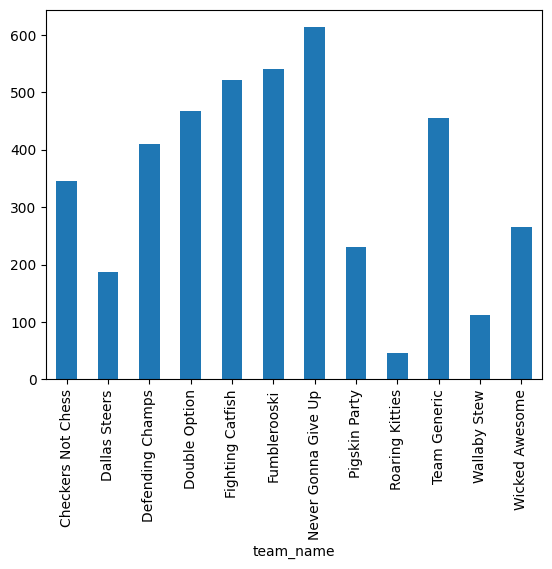

In [66]:
grouped_df.plot(kind="bar")